In [57]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.utils import load_img
import pathlib
from keras.applications.vgg16 import  preprocess_input,VGG16
from keras.applications.resnet50 import preprocess_input, ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator

In [60]:
%cd /content/drive/MyDrive/kaggle/

/content/drive/MyDrive/kaggle


In [61]:
!kaggle datasets download -d puneet6060/intel-image-classification --force

100% 345M/346M [00:17<00:00, 23.2MB/s]
100% 346M/346M [00:17<00:00, 20.9MB/s]


In [62]:
!kaggle datasets download -d puneet6060/intel-image-classification --unzip --force

100% 345M/346M [00:17<00:00, 22.7MB/s]
100% 346M/346M [00:17<00:00, 21.0MB/s]
User cancelled operation


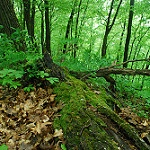

In [64]:
image=load_img('/content/drive/MyDrive/kaggle/seg_train/seg_train/forest/10037.jpg')
image

In [65]:
train_dir=('/content/drive/MyDrive/kaggle/seg_train/seg_train')
train_dir

'/content/drive/MyDrive/kaggle/seg_train/seg_train'

In [66]:
validation_dir=('/content/drive/MyDrive/kaggle/seg_pred/seg_pred')

In [67]:
test_dir=('/content/drive/MyDrive/kaggle/seg_test/seg_test')

In [68]:
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(train_dir,label_mode='categorical',image_size=(180, 180), batch_size=32)

Found 14034 files belonging to 6 classes.


In [69]:
from tensorflow.keras.utils import image_dataset_from_directory
test_dataset = image_dataset_from_directory(test_dir,label_mode='categorical',image_size=(180, 180), batch_size=32)

Found 3000 files belonging to 6 classes.


In [70]:
class_names=train_dataset.class_names
class_names

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [80]:
model=Sequential()

In [81]:
pretrained_model=keras.applications.resnet50.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(180,180,3),
    pooling='max',
)

In [82]:
pretrained_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 180, 180, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 186, 186, 3)          0         ['input_7[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 90, 90, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 90, 90, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [83]:
for layers in pretrained_model.layers:
  layers.trainable=False
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(6,activation='softmax'))

In [84]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 64)                131136    
                                                                 
 dense_9 (Dense)             (None, 6)                 390       
                                                                 
Total params: 23719238 (90.48 MB)
Trainable params: 131526 (513.77 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [85]:
model.compile(loss="binary_crossentropy",
 optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
 metrics=["accuracy"])

In [88]:
history=model.fit(
    train_dataset,
    validation_data=test_dataset,
    steps_per_epoch=4,
    epochs=30
)

Epoch 1/30
4/4 [==============================] - 1112s 370s/step - loss: 0.3917 - accuracy: 0.7266 - val_loss: 0.4514 - val_accuracy: 0.6627
Epoch 2/30
4/4 [==============================] - 7s 2s/step - loss: 0.3757 - accuracy: 0.6875 - val_loss: 0.3465 - val_accuracy: 0.7373
Epoch 3/30
4/4 [==============================] - 22s 7s/step - loss: 0.4127 - accuracy: 0.7109 - val_loss: 0.3144 - val_accuracy: 0.7373
Epoch 4/30
4/4 [==============================] - 46s 14s/step - loss: 0.4975 - accuracy: 0.6484 - val_loss: 0.4592 - val_accuracy: 0.6350
Epoch 5/30
4/4 [==============================] - 46s 14s/step - loss: 0.5565 - accuracy: 0.5859 - val_loss: 0.2865 - val_accuracy: 0.7417
Epoch 6/30
4/4 [==============================] - 46s 14s/step - loss: 0.3493 - accuracy: 0.6406 - val_loss: 0.2458 - val_accuracy: 0.7710
Epoch 7/30
4/4 [==============================] - 45s 14s/step - loss: 0.2850 - accuracy: 0.7500 - val_loss: 0.4184 - val_accuracy: 0.7190
Epoch 8/30
4/4 [===========

In [91]:
 test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

94/94 [==============================] - 8s 78ms/step - loss: 0.2126 - accuracy: 0.8260
Test accuracy: 0.826


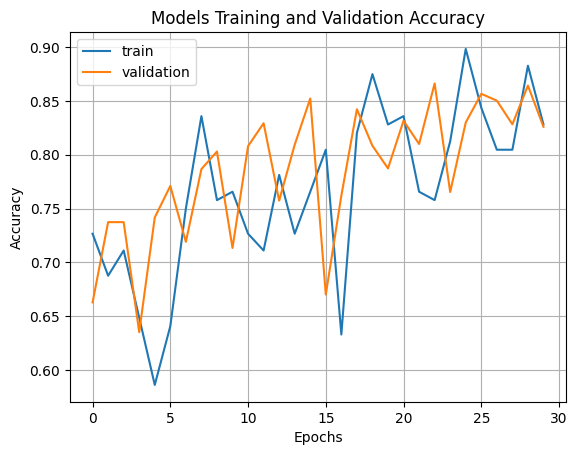

In [92]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Models Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.grid()
plt.show()

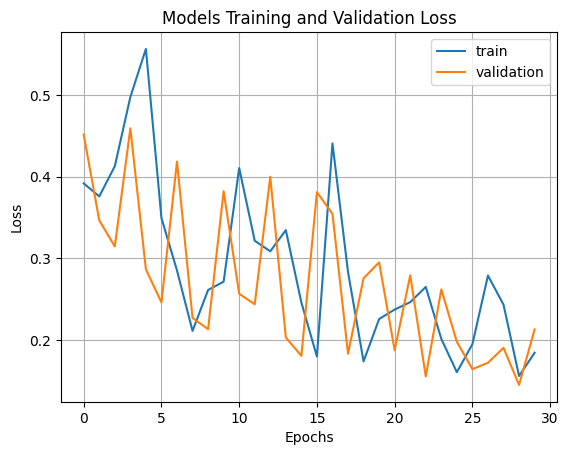

In [93]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Models Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.grid()
plt.show()
